In [1]:
import pandas as pd

from collections import Counter 
from wordcloud import WordCloud

from utils import preprocess

In [2]:
# read data
df = pd.read_json("../data/reviews_computers.json.gz", orient="records")
df = df.sample(20000) # subset
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 67376 to 29276
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   overall    20000 non-null  int64 
 1   vote       20000 non-null  int64 
 2   asin       20000 non-null  object
 3   text       20000 non-null  object
 4   summary    20000 non-null  object
 5   timestamp  20000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


In [3]:
# apply preprocessing
df["preprocess"] = df["text"].apply(preprocess)

/home/saiteki-kai/プロジェクト/進行中/data-analytics/venv/lib/python3.10/site-packages/bs4/__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [4]:
# token frequencies
tokens = [y.lower() for x in df["preprocess"] for y in x.split(" ")]
c = Counter(tokens)\

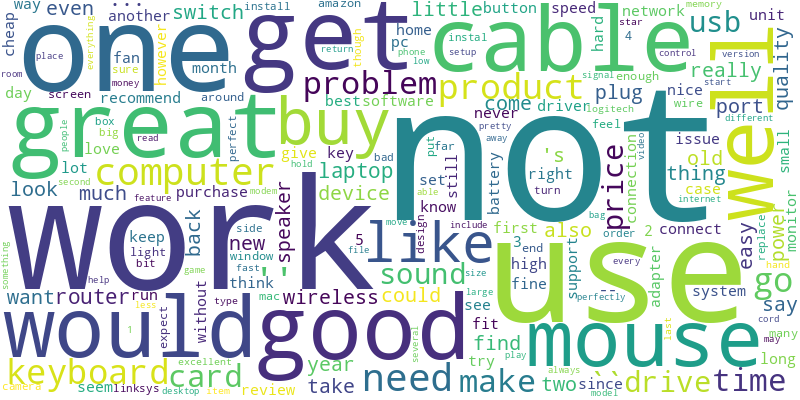

In [5]:
# generate the word cloud
w = WordCloud(width=800, height=400, background_color="white").fit_words(c)
w.to_image()